# networkx의 기본 사용법 살펴보기

In [1]:
import networkx as nx

# 네트워크 생성
g = nx.Graph() 

# 노드 생성
g.add_node(1)
g.add_nodes_from([1, 2, 3, 4, 5, 6]) # 중복으로 추가해도 에러 없음

# 노드 정보 확인
g.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [2]:
# 노드와 노드 연결(엣지 생성)
g.add_edge(1,3) 
g.add_edges_from([(1,3), (2,4), (2,5), (2,6), (3,4), (4,6), (5,6)])

# 엣지 정보 확인
g.edges()

EdgeView([(1, 3), (2, 4), (2, 5), (2, 6), (3, 4), (4, 6), (5, 6)])

In [3]:
#노드 수
print(g.number_of_nodes())

6


In [4]:
#엣지 수
print(g.number_of_edges())

7


In [5]:
len(g.edges())

7

In [6]:
#노드의 속성 설정
g.nodes[1]['gender']='male'
g.nodes[2]['gender']='female'
g.nodes[3]['gender']='male'
g.nodes[4]['gender']='female'
g.nodes[5]['gender']='male'
g.nodes[6]['gender']='male'

#노드의 속성 출력
print(nx.get_node_attributes(g, 'gender'))

{1: 'male', 2: 'female', 3: 'male', 4: 'female', 5: 'male', 6: 'male'}


In [7]:
#노드 간의 연결 강도 설정
g[1][3]['weight'] = 3
g[2][4]['weight'] = 1
g[2][5]['weight'] = 4
g[2][6]['weight'] = 3
g[3][4]['weight'] = 2
g[4][6]['weight'] = 3
g[5][6]['weight'] = 4

print(nx.get_edge_attributes(g, 'weight'))

{(1, 3): 3, (2, 4): 1, (2, 5): 4, (2, 6): 3, (3, 4): 2, (4, 6): 3, (5, 6): 4}


In [8]:
#노드 4와 연결된 노드
g[4] 

AtlasView({2: {'weight': 1}, 3: {'weight': 2}, 6: {'weight': 3}})

In [9]:
#노드 4와 연결된 노드 수
len(list(g.neighbors(4)))

3

In [10]:
#노드 4와 연결된 노드 수
g.degree(4)

3

In [11]:
#노드 4와 노드 2간의 연결 강도
g[4][2]

{'weight': 1}

In [12]:
#그래프의 연결
nx.degree(g)

DegreeView({1: 1, 2: 3, 3: 2, 4: 3, 5: 2, 6: 3})

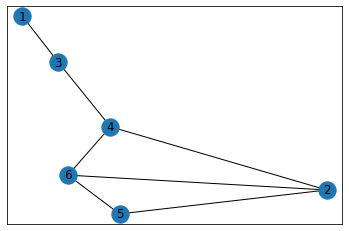

In [13]:
#그래프 시각화
import matplotlib.pyplot as plot
nx.draw_networkx(g) 
plot.show()

In [14]:
#연결중심성
nx.degree_centrality(g)

{1: 0.2,
 2: 0.6000000000000001,
 3: 0.4,
 4: 0.6000000000000001,
 5: 0.4,
 6: 0.6000000000000001}

In [15]:
#매개중심성
nx.betweenness_centrality(g)

{1: 0.0,
 2: 0.15000000000000002,
 3: 0.4,
 4: 0.6000000000000001,
 5: 0.0,
 6: 0.15000000000000002}

In [16]:
#근접중심성
nx.closeness_centrality(g)

{1: 0.38461538461538464,
 2: 0.625,
 3: 0.5555555555555556,
 4: 0.7142857142857143,
 5: 0.45454545454545453,
 6: 0.625}

# SNA 실습

## step0- 사전 환경 셋팅


*   konlpy, WordCloud 설치
*   한글 폰트 설치

In [17]:
# konlpy 설치
!pip install konlpy

In [18]:
# konlpy가 정상적으로 설치되었는지 확인
from konlpy.tag import Okt

okt = Okt()
okt.nouns('이 노트북은 의미 연결망 분석 실습을 합니다.')

['이', '노트북', '의미', '연결', '망', '분석', '실습']

In [19]:
# 워드 클라우스 설치
!pip install WordCloud

In [20]:
# 한글폰트 설치
# 폰트 설치 완료 후, [런타임 > 런타임 다시 시작] 진행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [21]:
# 'Nanum'이라는 단어가 들어간 폰트 출력
import matplotlib.font_manager as fm
fonts = fm.findSystemFonts()
[f for f in fonts if 'Nanum' in f]

['C:\\Windows\\Fonts\\NanumBarunGothic.ttf',
 'C:\\WINDOWS\\Fonts\\NanumSquare_0.ttf',
 'C:\\Users\\0biwa\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare.ttf',
 'C:\\Users\\0biwa\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareEB.ttf',
 'C:\\Users\\0biwa\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBrush.ttf',
 'C:\\WINDOWS\\Fonts\\NanumBarunGothic.ttf',
 'C:\\Users\\0biwa\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare_0.ttf',
 'C:\\Users\\0biwa\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumPen.ttf',
 'C:\\Users\\0biwa\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare_acR.ttf',
 'C:\\Windows\\Fonts\\NanumSquare_0.ttf',
 'C:\\Users\\0biwa\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare_acL.ttf',
 'C:\\Windows\\Fonts\\NanumSquare.ttf',
 'C:\\Windows\\Fonts\\NanumSquare_acL.ttf',
 'C:\\Windows\\Fonts\\NanumSquare_acR.ttf',
 'C:\\Users\\0biwa\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareB.ttf',
 'C:\\Users\\0biwa\\AppData\\Local\\Micro

In [22]:
text = '''(바티칸=뉴스1) 조소영 기자 = 프란치스코 교황이 18일(현지시간) 문재인 대통령과의 만남에서 사실상 방북(訪北)의사를 밝힘에 따라 문 대통령의 '한반도 평화프로세스' 추진에 상당한 힘이 실리게 됐다.

문 대통령은 교황의 지지를 기반으로 제2차 북미정상회담의 신속한 개최를 촉구하고 국제사회에 북한의 비핵화를 촉진하기 위해선 대북제재 완화가 일정 정도 필요하다는 주장을 이어갈 것으로 보인다.

문 대통령은 이날 오후 12시5분 바티칸 교황궁 내 교황서재에서 40분 동안 프란치스코 교황을 단독 예방했다. 교황과의 만남은 원활한 의사소통을 위한 통역 외에 배석자 없이 '비밀'로 이뤄진다는 원칙에 따라 이날 예방도 통역을 위해 자리한 한현택 신부 외 누구도 배석하지 않은 것으로 전해졌다.

다만 사전에 청와대와 바티칸 사이 협의를 거쳐 이례적으로 면담의 주요내용이 공개됐다. 이에 따라 윤영찬 청와대 국민소통수석이 밝힌 데 따르면 교황은 문 대통령이 김정은 북한 국무위원장의 방북 초청 의사를 전하면서 "김 위원장이 초청장을 보내도 좋겠느냐"고 하자 "공식 초청장을 보내주면 좋겠다"고 했다.

교황은 이어 "초청장이 오면 무조건 응답을 줄 것이고 나는 갈 수 있다"고 했다. '북한을 갈 수 있다'고 완벽히 언급하지는 않았지만 문맥상 이는 북한 땅을 밟겠다는 뜻으로 해석됐다.

교황은 그러면서 "한반도에서 평화프로세스를 추진 중인 한국정부의 노력을 강력히 지지한다"며 "멈추지 말고 앞으로 나아가라. 두려워하지 말라"고 하면서 이 해석에 힘을 보탰다.

윤 수석은 '교황이 방북시점에 대한 언급은 없었느냐'는 데에 "시점에 대해선 말이 없었다"고 전했다. 이에 따라 한편에선 교황의 답이 원론적 의미가 아니냐는 풀이도 나오지만 교황이 방북 자체에 문을 열어뒀다는 데에 의의가 있다는 평이다.

앞서 문 대통령이 추진하는 유럽에서의 한반도 평화프로세스 설득 작업은 주춤거리는 모양새가 감지됐었다.

문 대통령은 지난 15일 에마뉘엘 마크롱 프랑스 대통령과 만나 프랑스가 유엔 안보리 상임이사국으로서 대북제재 완화에 힘을 실어달라고 요청했지만 마크롱 대통령은 CVID(완전하고 불가역적이고 검증가능한 비핵화)를 강조하며 완곡한 거절의사를 밝힌 바 있다.

하지만 17일 문 대통령이 한반도 평화를 위한 특별미사에 참석하고 특별연설을 하면서 '한반도 평화프로세스'가 한껏 탄력을 받은 데 이어 18일 바티칸에서 알현한 교황이 적극적으로 나서면서 국제사회가 영향을 받을 수밖에 없을 것으로 보인다.

전세계 인구의 17.7%인 12억8500만명의 신자를 보유한 가톨릭의 수장이 직접 나서기 때문에 파급력이 상당할 것이기 때문이다. 아울러 교황의 방북이 성사되면 역사상 처음으로 북한 땅을 밟는 교황이라는 상징성도 갖게 된다.

문 대통령은 이러한 기세로 19일 벨기에 브뤼셀에서 열리는 제12차 아셈(ASEM·아시아-유럽정상회의)에서 영국과 독일, 태국 총리와 정상회담을 갖는다. 특히 영국, 독일 총리와 만나 대북제재 완화 등 한반도 평화프로세스 설득작업에 가속페달을 밟을 전망이다.

영국은 미국, 프랑스, 러시아, 중국과 함께 유엔 안보리 상임이사국에 속한다. 이미 5차례 비상임이사국을 지낸 독일은 내년 안보리 비상임이사국(2020년까지)으로 선출돼 있다.

silverpaper@news1.kr

▶ 진짜 블록체인을 만나는 곳 '크립토허브' 오픈!

▶ 글로벌바이오포럼 2018 참가하기

▶ 네이버 메인에서 [뉴스1]을 구독해주세요

[© 뉴스1코리아(news1.kr), 무단 전재 및 재배포 금지]'''

## step1- 텍스트 전처리

In [23]:
from konlpy.tag import Okt
import re
from collections import Counter
import matplotlib.font_manager as fm
import networkx as nx
import itertools
import matplotlib.pyplot as plt

# 한글만 추출
sentences = re.split(r'[\.\?\!]+', text) # '.','?,'!'가 나오면 문장의 끝이라고 가정하고 해당 문자가 나오면 쪼개줌.
filter = re.compile('[^ ㄱ-ㅣ가-힣]+')

# 문장 단위로 추출
filtered_sentences = []
for sentence in sentences:
    filtered_sentences.append(filter.sub('', sentence))

# 불용어 리스트
stopwords = ['진짜', '블록체인', '곳', '크립토허브', '오픈', '글로벌', '바이오', '포럼', '참가', '을', '네이버', '메인', '뉴스', '구독', '뉴스', '코리아',
                 '무단', '전재', '재배포', '금지', '조소영', '기자', '것', '데', '일']

# okt를 활용하여 명사만 추출하고, 불용어는 제거하여 리스트 생성
okt = Okt()

# 불용어는 제외한 명사 리스트
cleaned_noun_list = []

# 불용어 제거한 명사로 이루어진 문장 리스트
cleaned_sentence_list = []

for sentence in filtered_sentences:
    nouns = okt.nouns(sentence)
    clean_contents = [noun for noun in nouns if not noun in stopwords]
    cleaned_noun_list.extend(clean_contents)
    cleaned_sentence_list.append(clean_contents)

## step2 - Word Cloud

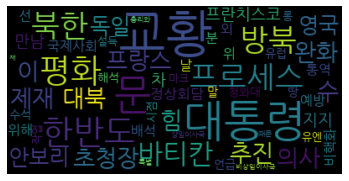

In [24]:
from wordcloud import WordCloud
# 단어 빈도수가 두 번 이상 나타난 단어에 대해서 wordcloud 생성
c = Counter(cleaned_noun_list)
len = 0
for key, val in c.items():
    if(val > 1) :
        len += 1
top_nouns = dict(c.most_common(len))
# print(top_nouns)

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=FONT_PATH, max_font_size = 60).generate_from_frequencies(top_nouns)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## step3 - SNA

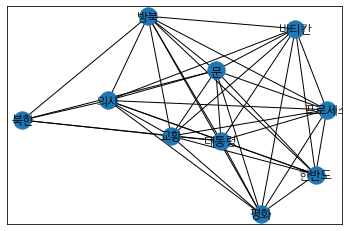

In [25]:
# SNA
c = Counter(cleaned_noun_list)
NUM_WORDS = 10
top_nouns = dict(c.most_common(NUM_WORDS))
#print(top_nouns)
unique_nouns = list(top_nouns.keys())

g = nx.Graph()
g.add_nodes_from(unique_nouns)

for pair in list(itertools.combinations(list(unique_nouns), 2)):
    if pair[0] == pair[1]:
        continue
    for sent in cleaned_sentence_list:
        if pair[0] in sent and pair[1] in sent:
            if pair in list(g.edges()) or (pair[1],pair[0]) in list(g.edges()):
                g[pair[0]][pair[1]]['weight'] += 1 # tie가 있으면 weight만 추가
            else:
                g.add_edge(pair[0], pair[1], weight=1 )

nx.draw_networkx(g, font_family='NanumGothic')

plt.show()

In [26]:
print('연결중심도')
print(sorted(nx.degree_centrality(g).items(), key=(lambda x :x[1]), reverse=True))
print('\n매개중심도')
print(sorted(nx.betweenness_centrality(g).items(), key=(lambda x :x[1]), reverse=True))
print('\n근접중심도')
print(sorted(nx.closeness_centrality(g).items(), key=(lambda x :x[1]), reverse=True))

for item in unique_nouns:
    connected_word_list = list(g[item].keys())
    num = g[item].__len__()
    print('\n[{}]: {}개 단어와 연결:'.format(item, num), end ='')    
    print(connected_word_list)

연결중심도
[('교황', 1.0), ('대통령', 1.0), ('문', 1.0), ('방북', 1.0), ('의사', 1.0), ('한반도', 0.8888888888888888), ('평화', 0.8888888888888888), ('프로세스', 0.8888888888888888), ('바티칸', 0.8888888888888888), ('북한', 0.5555555555555556)]

매개중심도
[('교황', 0.022222222222222223), ('대통령', 0.022222222222222223), ('문', 0.022222222222222223), ('방북', 0.022222222222222223), ('의사', 0.022222222222222223), ('한반도', 0.0), ('평화', 0.0), ('프로세스', 0.0), ('북한', 0.0), ('바티칸', 0.0)]

근접중심도
[('교황', 1.0), ('대통령', 1.0), ('문', 1.0), ('방북', 1.0), ('의사', 1.0), ('한반도', 0.9), ('평화', 0.9), ('프로세스', 0.9), ('바티칸', 0.9), ('북한', 0.6923076923076923)]

[교황]: 9개 단어와 연결:['대통령', '문', '한반도', '평화', '방북', '프로세스', '북한', '바티칸', '의사']

[대통령]: 9개 단어와 연결:['교황', '문', '한반도', '평화', '방북', '프로세스', '북한', '바티칸', '의사']

[문]: 9개 단어와 연결:['교황', '대통령', '한반도', '평화', '방북', '프로세스', '북한', '바티칸', '의사']

[한반도]: 8개 단어와 연결:['교황', '대통령', '문', '평화', '방북', '프로세스', '바티칸', '의사']

[평화]: 8개 단어와 연결:['교황', '대통령', '문', '한반도', '방북', '프로세스', '바티칸', '의사']

[방북]: 9개 단어와 연결:['교황', '대통령', '